In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

## Preparing data as Dataframe objecs

In [3]:
path_train_rumors = os.path.join("data","subtask-5A-arabic","train_rumors.json")
path_dev_rumors = os.path.join("data","subtask-5A-arabic","dev_rumors.json")
path_relevance_judgments = os.path.join("data","subtask-5A-arabic","relevance_judgments.txt")
path_relevence_including_zero = os.path.join("data","subtask-5A-arabic","relevance_with_zeros.csv")

In [3]:
def read_json_file(path):
    f = open(path , encoding="utf8")
    data = json.load(f)
    f.close()
    return data

In [4]:

columns = ["rumor_id", "0", "user_id", "relevance"]
def text_to_dataframe(path , columns):
    df = pd.DataFrame(columns=columns)
    file = open(path , 'r')

    for line in file:
        line = line.strip().split('\t')
        df.loc[len(df)] = line

    file.close()
    
    
    return df

In [5]:
def json_to_dataframe(json_object):
    df = pd.DataFrame()
    for i in json_object[0].keys():
        df[i] = [json_object[j][i] for j in range(len(json_object))]
    return df

The metaadata directory contains **1000 json files**, each one of them contain **1193 lines**. Each line of these 1193 contains **10 features**

## Data analysis

### 1. Train and Developpement rumors

In [19]:
train_rumors = read_json_file(path_train_rumors)
dev_rumors = read_json_file(path_dev_rumors)

train_rumors = json_to_dataframe(train_rumors)
dev_rumors = json_to_dataframe(dev_rumors)

In [20]:
train_rumors.columns , train_rumors.shape 

(Index(['rumor_id', 'tweet_id', 'tweet_text', 'category'], dtype='object'),
 (120, 4))

In [21]:
dev_rumors.columns , dev_rumors.shape

(Index(['rumor_id', 'tweet_id', 'tweet_text', 'category'], dtype='object'),
 (30, 4))

In [22]:
train_rumors.tail(3)

,rumor_id,tweet_id,tweet_text,category
117,AuFIN_118,1425132064450531328,#فيديو || اول مرّة في تاريخ الاندية الفرنسية ن...,sports
118,AuFIN_119,1221841304512057344,شوبير يعترف ان ادارة الأهلي ضغطت على الكاف واج...,sports
119,AuFIN_120,1434275913152217089,عاجل: النايل سات ١٣٠ مليون مشاهد قنوات mbc بر...,sports


In [23]:
dev_rumors.head(3)

,rumor_id,tweet_id,tweet_text,category
0,AuFIN_121,1406642665689649156,بشرى سارة للأشقاء في الخليج …\n\nالمحكمة الإسر...,politics
1,AuFIN_122,1335681592300331010,#عاجل وفاة #خامنئي المرشد الأعلى في إيران منذ ...,politics
2,AuFIN_123,1324220773435727872,#الجزائر ترفض التطبيع العلني وتفضله أن يكون سر...,politics


In [24]:
train_rumors["category"].value_counts()

politics    40
health      40
sports      40
Name: category, dtype: int64

In [25]:
dev_rumors["category"].value_counts()

politics    10
health      10
sports      10
Name: category, dtype: int64

In [26]:
def print_rumors(data):
    for i in data.index:
        print(data["tweet_text"][i])

In [27]:
print_rumors(train_rumors)

موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغانستان ويعتبر مندوب لملالي إيران 😉
- الصورة من إجتماع الأرهابيين وفد من طالبان مع هنية ليلة الأمس   😎
تم في كشك قطر "ممول الا.ر.هاب" 
#حفظ_الله_مصر https://t.co/Rnd14ZXv6C
مزيداً من الأنحدار نحو مستنقع التطبيع القذر..حسين الجسمي يشارك في تلحين اغنية إسرائيلية تبدأ برساله شكر للأمارات من الرئيس الأسرائيلي في تل ابيب على أنقاض قرانا الفلسطينية التي مسحت عن وجه الارض...خسئتم انتم عار علينا.. والعروبة والدين بريئةٌ من امثالكم 
#التطبيع_خيانة_عظمى https://t.co/1pdoGqkZSH
بتوجيهات من هيثم بن طارق آل سعيد سلطان عمان استدعت سلطنة عمان  سفيرها في الدوحة، اليوم  ودعت قطر إلى الكف عن نشاطاتها المزعزعة للاستقرار والأمن.
وتأتي الخطوة تعكس التضامن مع المملكة العربية السعودية التي قطعت العلاقات من قطر منتصف عام 2017 ، إضافة إلى الإمارات https://t.co/LMVgSR1OSi
.
.

متظاهرون أتراك يهاجمون البنك الكويتي التركي في إسطنبول .. بعد انهيار الليرة التركية ..

.
كما وصلني .. https://t.co/qncixBrPXg
وين ولد الملحه 
عــــــــاجل
رئيس اركان الجيش الكويتي الفريق الركن

Every single rumor in the training data belongs to one one single user.

In [28]:
a = train_rumors["tweet_id"].value_counts()
max(a)

1

In [29]:
a = dev_rumors["tweet_id"].value_counts()
max(a)

1

### 2. Relevence data

In [30]:
rumors = pd.concat([train_rumors , dev_rumors])
rumors.head(3)

,rumor_id,tweet_id,tweet_text,category
0,AuFIN_001,1427297428890398725,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...,politics
1,AuFIN_002,1311033577543479297,مزيداً من الأنحدار نحو مستنقع التطبيع القذر..ح...,politics
2,AuFIN_003,1225883281700290560,بتوجيهات من هيثم بن طارق آل سعيد سلطان عمان اس...,politics


In [31]:
columns = ["rumor_id", "0", "user_id", "relevance"]
relevance_data = text_to_dataframe(path_relevance_judgments , columns).drop(["0"] , axis=1)
relevance_data.tail(3) , relevance_data.shape

(       rumor_id              user_id relevance
 1041  AuFIN_023  1186788943930499072         2
 1042  AuFIN_102           2572368029         1
 1043  AuFIN_104   827130813632376836         2,
 (1044, 3))

This data assigns a degree of relevence to each pair of a rumor and one of its corresponding authorities; 2 if the authority is highly relevant to the rumor (has higher priority to be contacted); 1 if she is relevant.

The number of authorities used to verify the rumors in the training and developpement data are:

In [32]:
relevance_data["user_id"].value_counts()

259372802              25
142264595              13
460210929              13
569792145              12
293466923              11
                       ..
1295065674994204672     1
2276640199              1
1335830366              1
19280428                1
827130813632376836      1
Name: user_id, Length: 526, dtype: int64

526 authorities has been conssulted to verify the rumors of the training and developpement data.

In [33]:
relevance_data[relevance_data["user_id"] == "259372802"]    

,rumor_id,user_id,relevance
63,AuFIN_135,259372802,2
67,AuFIN_103,259372802,2
71,AuFIN_046,259372802,1
84,AuFIN_013,259372802,1
274,AuFIN_137,259372802,1
301,AuFIN_076,259372802,1
307,AuFIN_041,259372802,2
339,AuFIN_020,259372802,1
367,AuFIN_133,259372802,2
418,AuFIN_128,259372802,1


In [34]:
rumors[rumors["rumor_id"] == "AuFIN_132"]

,rumor_id,tweet_id,tweet_text,category
11,AuFIN_132,1282634667326410755,🔴مشروع أكبر صرح طبي للكشف عن فيروس كورونا في س...,health


In [35]:
user_id = "259372802"  #copy the user_id of the authority
link = "https://twitter.com/intent/user?user_id="+user_id
link

'https://twitter.com/intent/user?user_id=259372802'

The authority with **user_id = 259372802** has been used to verify **25** rumors. 

In [36]:
relevance_data["relevance"].value_counts()

2    619
1    425
Name: relevance, dtype: int64

only pairs with relevance = 1 (425 times) or 2 (619 times) are reported in the relevance_data. Relevance = 0 is assumed for all pairs not appearing in the dataframe.

In [37]:
relevance_data["rumor_id"].value_counts()

AuFIN_106    22
AuFIN_076    19
AuFIN_098    18
AuFIN_069    17
AuFIN_100    17
             ..
AuFIN_081     1
AuFIN_118     1
AuFIN_014     1
AuFIN_146     1
AuFIN_104     1
Name: rumor_id, Length: 150, dtype: int64

The number of unique rumors in the relevence data are 150 (**120 train_rumors** and **30 dev_rumors**).


The rumor with **ID = AuFIN_106** can be verified by **22** authorities.

In [38]:
relevance_data[relevance_data["rumor_id"] == "AuFIN_106"]

,rumor_id,user_id,relevance
344,AuFIN_106,4816936572,2
345,AuFIN_106,1116034096818466816,1
346,AuFIN_106,570223846,1
347,AuFIN_106,246727008,2
348,AuFIN_106,844860412008980481,2
349,AuFIN_106,710569086296653824,1
350,AuFIN_106,891970979374694400,1
351,AuFIN_106,1099928406156816384,2
352,AuFIN_106,709085388468588544,1
353,AuFIN_106,717844112364404738,1


In [39]:
# Data represents the dataframe containing the rumor with id=AuFIN_023
data = train_rumors[train_rumors["rumor_id"] == "AuFIN_023"]
print_rumors(data)

بكل فخر صنع في مصر 🇪🇬 رامي السبيعي اول مصري واول عربي يفوز بمستر اولمبيا في التاريخ مبروك لمصر والعرب #بيج_رامي https://t.co/BzNmoR33A4


To extract the user IDs of the authorities that can be consulted to verify a specific rumor ID (e.g., **AuFIN_023**), execute the following instruction:

In [40]:
data = relevance_data[relevance_data["rumor_id"] == "AuFIN_023"]
data

,rumor_id,user_id,relevance
737,AuFIN_023,70407496,2
738,AuFIN_023,435697807,2
1041,AuFIN_023,1186788943930499072,2


The user_id in relevance_data belongs to the user_id of the twitter account of the auathority. To check the twitter accounts associated to these authorities, execute the following instruction, and use the provided link. For instance https://twitter.com/intent/user?user_id=1186788943930499072 .


### 3. Twitter Lists Metadata

There are 1193 Twitter lists, each list is mentioned one time in a provided Json file. Meaning each list is mentionned 1000 times.

In [ ]:
# owner_id = "480830188"  #copy the user_id of the authority
# link = "https://twitter.com/intent/user?user_id="+user_id
# link

In [ ]:
pwd

### 4. User metadata

In [81]:
user_id = "270471814"  #copy the user_id of the authority
link = "https://twitter.com/intent/user?user_id="+user_id
link

'https://twitter.com/intent/user?user_id=270471814'

If you want the link of a tweet_id from user_id, just copy the corresponding IDs following this instruction. 

In [84]:
user_id , tweet_id = "270471814" , "1422276810822279171"  #copy the user_id and tweet_id
link = "https://twitter.com/" + user_id + "/status/" + tweet_id
link

'https://twitter.com/270471814/status/1422276810822279171'

In [52]:
# directory = "users_metadata"
# columns = ['user_id', 'name', 'description', 'translated_name', 'translated_desc','following_count', 'followers_count', 'verified', 'lists_count','lists_ids', 'collected_Arabic_tweets_ids']
# df_metadata = pd.DataFrame(columns=columns)



# t = time.time()
# for subdir, dirs, files in os.walk(directory):
#     for file in files:
#         # Check if the file is a JSON file
#         if file.endswith('.json'):
#             # Read the JSON file into a dictionary
#             with open(os.path.join(subdir, file), 'r') as f:
#                 user_metadata = read_json_file(os.path.join(subdir, file))
#                 user_metadata = json_to_dataframe(user_metadata)
#                 df_metadata = pd.concat([df_metadata , user_metadata])
# print("the required time for this operation is : " , time.time() - t)

In [31]:
# df_metadata.head()

In [49]:
# df_metadata = df_metadata.drop("collected_Arabic_tweets_ids", axis=1)

In [51]:
# df_metadata.to_csv('df_metadata.csv', index=False)

In [32]:
# len(df_metadata["user_id"].unique()) , len(df_metadata)

In [33]:
# unique_auts = relevance_data["user_id"].value_counts(sort = False).index
# unique_auts = list(map(int, unique_auts))
# auts_metadata = df_metadata[df_metadata['user_id'].isin(unique_auts)]
# len(auts_metadata) , len(unique_auts)

In [53]:
auts_metadata = pd.read_csv("auts_metadata.csv")
auts_metadata.head(2)

,user_id,name,description,translated_name,translated_desc,following_count,followers_count,verified,lists_count,lists_ids,collected_Arabic_tweets_ids
0,270471814,Yusra Ghannouchi,NaN,NaN,NaN,1289,23167,0,111,"1452290953503514644,1449482072523956233,144730...","1440732142120542210,1422276810822279171,142222..."
1,847030764587900929,Mohamed Goumani,‏‏‏‏محمد القوماني، نائب بالبرلمان التونسي، كات...,NaN,محمد القوماني نائب بالبرلمان التونسي كاتب صحفي...,309,541,0,2,"1317075245023592449,67829116","1400570641204584449,979457673090535425,1454859..."


In [54]:
tweets_count = []
for i in range(len(auts_metadata)):
    tweets_count.append(len(auts_metadata["collected_Arabic_tweets_ids"][i]))
    
auts_metadata["tweets_count"] = tweets_count

In [55]:
auts_metadata["verified"].value_counts()

1    360
0    166
Name: verified, dtype: int64

In [56]:
auts_metadata["followers_count"].describe()

count    5.260000e+02
mean     6.834464e+05
std      1.802737e+06
min      2.100000e+01
25%      1.073500e+04
50%      9.310800e+04
75%      3.966580e+05
max      1.729024e+07
Name: followers_count, dtype: float64

Text(0.5, 1.0, 'the probability  density function of  followers_count')

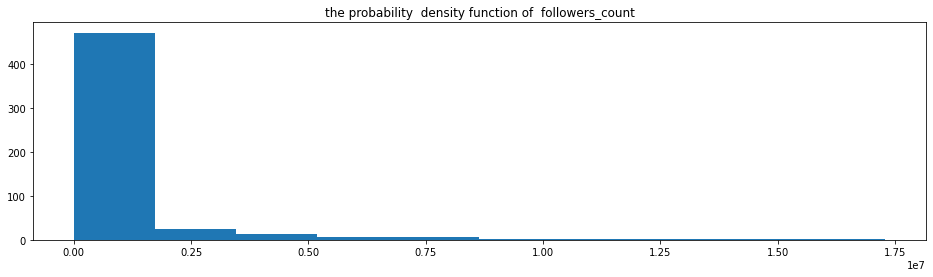

In [57]:
plt.figure(figsize = (16 , 4))
plt.hist(auts_metadata["followers_count"], density=False)
plt.title("the probability  density function of  followers_count")

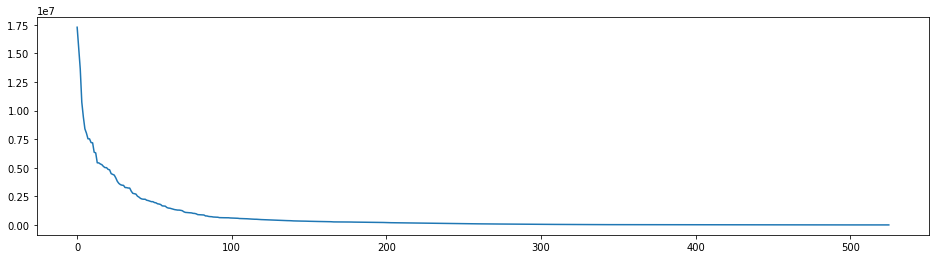

In [58]:
plt.figure(figsize = (16 , 4))
plt.plot(auts_metadata["followers_count"].sort_values(ascending=False).values)

In [59]:
auts_metadata["following_count"].describe()

count      526.000000
mean       317.444867
std        914.291878
min          0.000000
25%          9.000000
50%         70.500000
75%        246.500000
max      13194.000000
Name: following_count, dtype: float64

Text(0.5, 1.0, 'the probability  density function of  following_count')

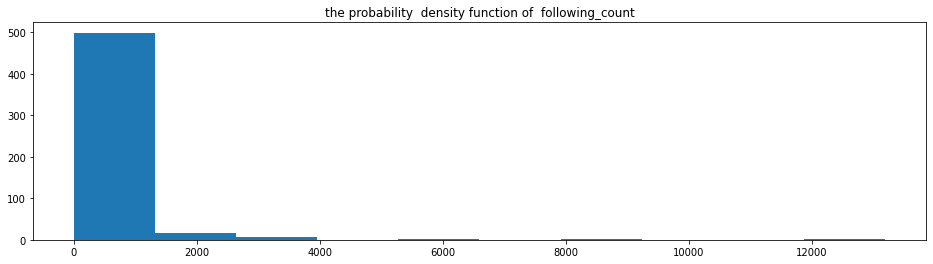

In [60]:
plt.figure(figsize = (16 , 4))
plt.hist(auts_metadata["following_count"], density=False)
plt.title("the probability  density function of  following_count")

In [61]:
auts_metadata["tweets_count"].describe()

count      526.000000
mean     33881.777567
std      23664.095914
min         37.000000
25%      10021.250000
50%      33989.000000
75%      58372.500000
max      64999.000000
Name: tweets_count, dtype: float64

Text(0.5, 1.0, 'the probability  density function of  tweets_count')

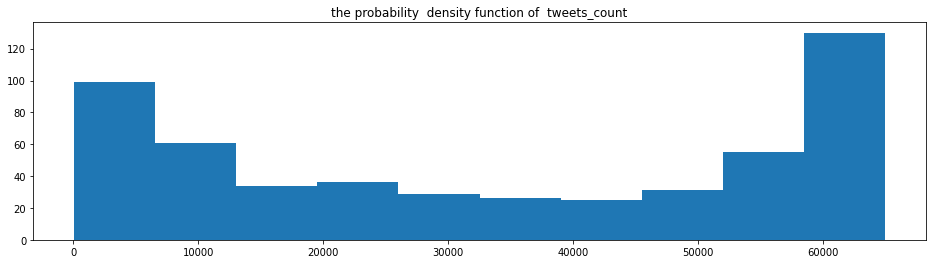

In [62]:
plt.figure(figsize = (16 , 4))
plt.hist(auts_metadata["tweets_count"], density=False)
plt.title("the probability  density function of  tweets_count")

In [63]:
relevance_data[relevance_data["user_id"] == "270471814"]

,rumor_id,user_id,relevance
2,AuFIN_094,270471814,2


In [64]:
rumors[rumors["rumor_id"] == "AuFIN_094"]

,rumor_id,tweet_id,tweet_text,category
93,AuFIN_094,1431520406083616769,من له ملف فساد ضد النهضة فاليستعجل لتقديمه للق...,politics


In [65]:
# unique_auts = relevance_data["user_id"].value_counts(sort = False).index
# unique_auts = list(map(int, unique_auts))
# auts_metadata = df_metadata[df_metadata['user_id'].isin(unique_auts)]
# len(auts_metadata) , len(unique_auts)

In [66]:
auts_verified_0 = auts_metadata[auts_metadata["verified"] == 0]["user_id"].values
auts_verified_0 = list(map(str, auts_verified_0))
auts_verified_1 = auts_metadata[auts_metadata["verified"] == 1]["user_id"].values
auts_verified_1 = list(map(str, auts_verified_1))

len(auts_verified_0) , len(auts_verified_1)

(166, 360)

In [67]:
rel_ver_1 = relevance_data[relevance_data['user_id'].isin(auts_verified_1)]
rel_ver_1["relevance"].value_counts()

2    465
1    332
Name: relevance, dtype: int64

In [68]:
#rumors[rumors['rumor_id'].isin(rel_ver_1["rumor_id"])]

In [69]:
rel_ver_0 = relevance_data[relevance_data['user_id'].isin(auts_verified_0)]
rel_ver_0["relevance"].value_counts()

2    154
1     93
Name: relevance, dtype: int64

In [70]:
#rumors[rumors['rumor_id'].isin(rel_ver_0["rumor_id"])]

In [71]:
rumors.head(1)

,rumor_id,tweet_id,tweet_text,category
0,AuFIN_001,1427297428890398725,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...,politics


In [72]:
users_name = []
rumors_text = []
users_description = []

for i in range(len(relevance_data)):
    user_id = relevance_data["user_id"][i]
    rumor_id = relevance_data["rumor_id"][i]
    
    
    users_name.append(auts_metadata[auts_metadata["user_id"] == int(user_id)]["name"].values[0])
    users_description.append(auts_metadata[auts_metadata["user_id"] == int(user_id)]["description"].values[0])
    rumors_text.append(rumors[rumors["rumor_id"] == rumor_id]["tweet_text"].values[0])
    
    
relevance_data["users_name"] = users_name
relevance_data["users_description"] = users_description
relevance_data["rumors_text"] = rumors_text

In [77]:
relevance_data[relevance_data["rumor_id"] == "AuFIN_001"]

,rumor_id,user_id,relevance,users_name,users_description,rumors_text
33,AuFIN_001,388799598,2,د. عبد اللطيف القانوع,الناطق الاعلامي باسم حركة حماس \n\nحاصل على در...,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
34,AuFIN_001,613359204,2,حازم قاسم,الناطق الإعلامي باسم حركة المقاومة الإسلامية حماس,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
35,AuFIN_001,373257377,1,قناة الأقصى الفضائية,قناة الأقصى الفضائية ..عينك على الوطن,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
36,AuFIN_001,395505160,2,النائب مشير المصري,الصفحة الرسمية للنائب مشير المصري,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
37,AuFIN_001,338574743,2,د. موسى أبو مرزوق DR. Mousa Abumarzook,أول رئيس للمكتب السياسي لحركة حماس,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
38,AuFIN_001,325268167,1,الخارجية القطرية,الحساب الرسمي لوزارة الخارجية القطرية,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...
39,AuFIN_001,712217980264947712,1,محمد بن عبدالرحمن,نائب رئيس مجلس الوزراء وزير الخارجية - Deputy ...,موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغ...


In [78]:
i = 36
print("the rumor is : " , relevance_data["rumors_text"][i])
print("---------------------------------------------------------------------")
print("the authority name is : " , relevance_data["users_name"][i])
print("---------------------------------------------------------------------")
print("the description of the authority is : " , relevance_data["users_description"][i])
print("---------------------------------------------------------------------")
print("the relevence is : " , relevance_data["relevance"][i])

the rumor is :  موسى أبو مرزوق الحمساوى يهنئ طالبان بفوزه بأفغانستان ويعتبر مندوب لملالي إيران 😉
- الصورة من إجتماع الأرهابيين وفد من طالبان مع هنية ليلة الأمس   😎
تم في كشك قطر "ممول الا.ر.هاب" 
#حفظ_الله_مصر https://t.co/Rnd14ZXv6C
---------------------------------------------------------------------
the authority name is :  النائب مشير المصري
---------------------------------------------------------------------
the description of the authority is :  الصفحة الرسمية للنائب مشير المصري
---------------------------------------------------------------------
the relevence is :  2


In [80]:
auts_metadata

,user_id,name,description,translated_name,translated_desc,following_count,followers_count,verified,lists_count,lists_ids,collected_Arabic_tweets_ids,tweets_count
0,270471814,Yusra Ghannouchi,NaN,NaN,NaN,1289,23167,0,111,"1452290953503514644,1449482072523956233,144730...","1440732142120542210,1422276810822279171,142222...",22887
1,847030764587900929,Mohamed Goumani,‏‏‏‏محمد القوماني، نائب بالبرلمان التونسي، كات...,NaN,محمد القوماني نائب بالبرلمان التونسي كاتب صحفي...,309,541,0,2,"1317075245023592449,67829116","1400570641204584449,979457673090535425,1454859...",4348
2,836271611670036484,jamila debech ksiksi,#Députée _ ARP #Tunisie \n#Présidente_AWLN-T...,NaN,النائب تونس الرئيس تونس الرئيس السابق للتجمع ا...,428,1115,0,4,"1259276962226372610,1081465189118050304,939458...","846883829335949312,1243639555040980993,9051279...",7289
3,756193462932807681,Turkish Cons Misrata,Türkiye Cumhuriyeti Misurata Başkonsolosluğu R...,سلبيات تركية مصراتة,صفحة تويتر الرسمية للقنصلية العامة لجمهورية تر...,102,1282,0,19,"1375822010786451456,1360230557695832066,133594...","1021761894347153408,991039170419331073,1052477...",12570
4,3099604144,Turkish Embassy Libya,Türkiye Cumhuriyeti Trablus Büyükelçiliği / سف...,السفارة التركية بليبيا,سفارة جمهورية تركيا في ليبيا سفارة الجمهورية ا...,172,4297,0,52,"1446074375359377410,1446073977500282881,144607...","1031809818078732290,1047618102761066496,100992...",17615
...,...,...,...,...,...,...,...,...,...,...,...,...
521,1526932652,هزاع بن زايد,الحساب الرسمي لسمو الشيخ هزاع بن زايد آل نهيان...,هزاع بن زايد,الحساب الرسمي لسمو الشيخ هزاع بن زايد آل نهيان...,7,787774,1,352,"1464196625627332637,1463401642162798592,146340...","1282385751431413760,1060890833325617152,137185...",15469
522,570223846,عبدربه منصور هادي,الحساب الرسمي للرئيس عـبـدربـه مـنصـور هــادي ...,عبدربه منصور هادي,الحساب الرسمي للرئيس عبدربه منصور هادي الحساب ...,0,670894,1,604,"1461485765154717706,1459575978401972232,145952...","772760995592867844,1438587918658977797,6036160...",53352
523,2894575251,الأزهر الشريف,الحساب الرسمي للأزهر الشريف,الأزهر الشريف,الحساب الرسمي للأزهر الشريف,2,286490,1,276,"1460508189838004229,1453749066375041025,145359...","1363522341746208769,1234445102866628609,124538...",61219
524,258431777,Moath alkhawaldeh,المتحدث الإعلامي باسم جماعة الإخوان المسلمين/ ...,معاذ الخوالدة,المتحدث الإعلامي باسم جماعة الإخوان المسلمين ا...,596,1697,0,8,"895670499065249792,812403545702092801,80722209...","390398373468975104,408923018895699968,65328287...",41239


A model can be built to predict the probability an account is an official account.